# <span style="color:blue"> Statistics Hackathon </span>

#### Importing the Libraries

In [294]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
from matplotlib import rcParams
from pylab import *
from scipy import *

#### Reading and exploring the Data

In [295]:
data = pd.read_excel("./School Enrollment Statistics 2012-2016.xlsx")

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6077 entries, 0 to 6076
Data columns (total 96 columns):
Dise No.                6077 non-null int64
Rural / Urban           6077 non-null object
Year                    6077 non-null object
Block Code              6077 non-null int64
Block Name              6077 non-null object
Village Code            6077 non-null int64
Village Name            6077 non-null object
Zonal Office            6077 non-null object
CRC Code                6077 non-null int64
CRC No.                 6077 non-null object
Pin Code                6077 non-null int64
School Name             6077 non-null object
School Status Code      6077 non-null int64
School Status           6077 non-null object
Management Code         6077 non-null int64
Management Name         6077 non-null object
Category Code           6077 non-null int64
Category Name           6077 non-null object
School Type Code        6077 non-null int64
School Type Name        6077 non-null object
Lo

In [297]:
data.describe()

,Dise No.,Block Code,Village Code,CRC Code,Pin Code,School Status Code,Management Code,Category Code,School Type Code,Lowest Class,...,6_8 Total,1_8 Boys,1_8 Girls,1_8 Total,9_12 Boys,9_12 Girls,9_12 Total,1_12 Boys,1_12 Girls,1_12 Total
count,6.077000e+03,6077.000000,6.077000e+03,6.077000e+03,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,...,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000,6077.000000
mean,2.725158e+10,272515.831002,2.725158e+08,2.725158e+09,410889.798749,0.022709,14.612473,3.824420,2.878723,3.209149,...,124.498272,181.195327,161.872635,343.067961,67.332072,61.381274,128.713345,248.527398,223.253908,471.781307
std,1.376656e+05,1.377989,1.376653e+03,1.377985e+04,7382.763001,0.180914,7.155684,3.011161,0.422698,3.238724,...,197.771273,245.061331,224.598750,401.640937,192.980060,191.303518,330.509856,358.182496,347.517654,579.461969
min,2.725140e+10,272514.000000,2.725140e+08,2.725140e+09,4110.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.725150e+10,272515.000000,2.725150e+08,2.725150e+09,411009.000000,0.000000,4.000000,2.000000,3.000000,1.000000,...,5.000000,28.000000,23.000000,80.000000,0.000000,0.000000,0.000000,55.000000,50.000000,150.000000
50%,2.725160e+10,272516.000000,2.725160e+08,2.725160e+09,411028.000000,0.000000,17.000000,2.000000,3.000000,1.000000,...,67.000000,100.000000,88.000000,221.000000,0.000000,0.000000,0.000000,140.000000,127.000000,290.000000
75%,2.725170e+10,272517.000000,2.725170e+08,2.725170e+09,411041.000000,0.000000,20.000000,7.000000,3.000000,5.000000,...,145.000000,239.000000,212.000000,459.000000,50.000000,40.000000,106.000000,304.000000,267.000000,563.000000
max,2.725180e+10,272518.000000,2.725180e+08,2.725180e+09,411103.000000,2.000000,99.000000,11.000000,9.000000,12.000000,...,2327.000000,2955.000000,2628.000000,4375.000000,3365.000000,2852.000000,4411.000000,6237.000000,5199.000000,7205.000000


In [298]:
data.head()

,Dise No.,Rural / Urban,Year,Block Code,Block Name,Village Code,Village Name,Zonal Office,CRC Code,CRC No.,...,6_8 Total,1_8 Boys,1_8 Girls,1_8 Total,9_12 Boys,9_12 Girls,9_12 Total,1_12 Boys,1_12 Girls,1_12 Total
0,27251400101,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,0,120,128,248,0,0,0,120,128,248
1,27251400102,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,125,0,296,296,0,0,0,0,296,296
2,27251400103,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,111,283,0,283,0,0,0,283,0,283
3,27251400104,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,0,34,34,68,0,0,0,34,34,68
4,27251400105,Urban,2012-13,272514,Aundh,272514001,AUNDH GAON,Aundh,2725140001,Aundh CRC No. 1,...,0,78,79,157,0,0,0,78,79,157


In [299]:
data.columns

Index(['Dise No.', 'Rural / Urban', 'Year', 'Block Code', 'Block Name',
       'Village Code', 'Village Name', 'Zonal Office', 'CRC Code', 'CRC No.',
       'Pin Code', 'School Name', 'School Status Code', 'School Status',
       'Management Code', 'Management Name', 'Category Code', 'Category Name',
       'School Type Code', 'School Type Name', 'Lowest Class', 'Highest Class',
       'Medium Code', 'Medium', 'Building Status Code', 'Building Status',
       'Electricity Code', 'Electricity', 'Boundary Wall Code',
       'Boundary Wall', 'Library Code', 'Library', 'Playground Code',
       'Playground', 'Water Code', 'Water', 'Ramp Code', 'Ramp',
       'HM Room Code', 'HM Room', 'Kitchen Shed Code', 'Kitchen Shed',
       'Pre Primary Boys', 'Pre Primary Girls', 'Pre Primary Total', '1 Boys',
       '1 Girls', '1 Total', '2 Boys', '2 Girls', '2 Total', '3 Boys',
       '3 Girls', '3 Total', '4 Boys', '4 Girls', '4 Total', '5 Boys',
       '5 Girls', '5 Total', '6 Boys', '6 Girls', '6

## <span style="color:Orange">Block vs Management School Count </span>
###### * Plot to describe how many Schools fall under each Management BlockWise
<a id='Block_vs_Management'></a>

In [300]:
X=data.groupby(['Block Name','Management Name'])['Management Name'].count()
X.head(50)

Block Name  Management Name                                                            
Aundh       Central School                                                                   5
            MNC                                                                            335
            No Response                                                                      1
            Partially Aided                                                                  6
            Permanent Unaided                                                              514
            Pvt. Aided                                                                     395
            Self Finance                                                                    16
            Social Welfare Aided                                                            12
            Un-Recognised                                                                   25
            Unaided                                      

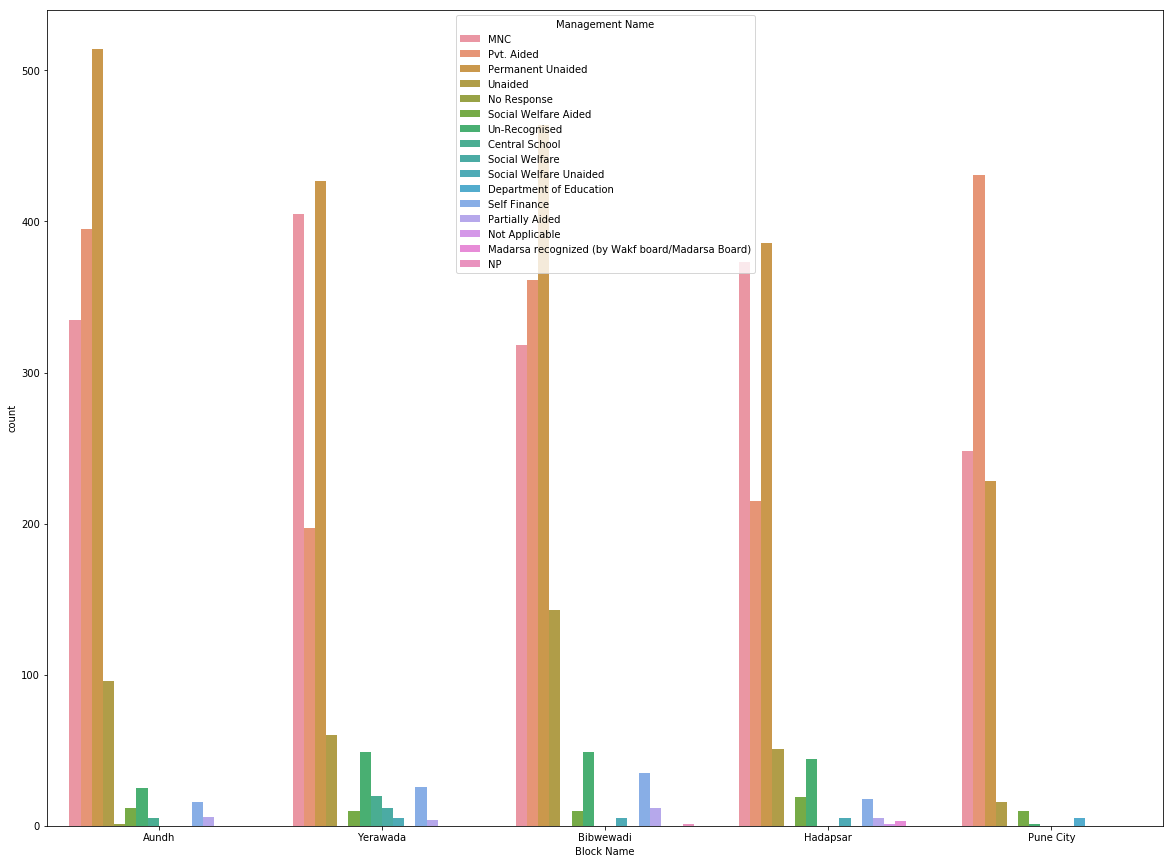

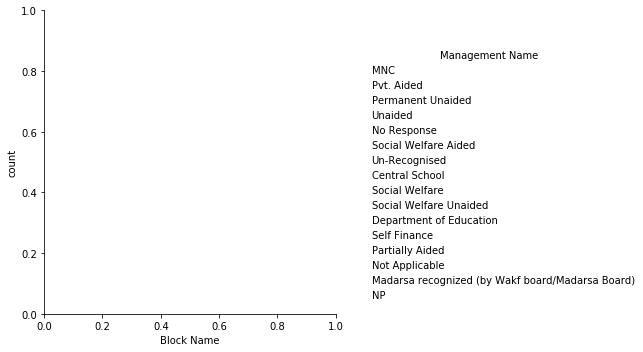

In [301]:
# plt.subplots(figsize=(20,15))
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
#fig =plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
p=sb.catplot("Block Name", data=data, hue='Management Name',kind='count',ax=ax)


#### Inferences from Block vs School Count

* The top 4 Management with maximum of number of schools under them are **MNC, Pvt. Aided, Permanent Unaided and Unaided**
* The **Central School** are available only in **Aundh** and **Yerwada** Blocks.

## <span style="color:Orange"> Management Performance based on facilities provided</span>


** The Facilities in the schools are provided by the Management are namely**
* Electricity
* Library
* Playground
* Ramp
* HM Room

The above all facilities can be clubbed in to one attribute. If all the facilities are available then its value is **5** and if none is availble then it's val is **0**.

* The response values are label encoded as **0** and  **1**, i.e. if the particular facility is provided then it is **1** and if the facility is not available in any form then it is **0**

<span style="color:green">* **The below piece of code does label encoding for the facilities as described above**</span>

In [302]:
data['Electricity_mod']=data['Electricity'].replace(['Yes', 'No', 'No Response','Yes but not functioning'], [1,0,0,0])

In [303]:
data['Electricity_mod'].value_counts()

1    6055
0      22
Name: Electricity_mod, dtype: int64

In [304]:
data['Library_mod']=data['Library'].replace(['Yes', 'No', 'No Response'], [1,0,0])

In [305]:
data['Library_mod'].value_counts()

1    5780
0     297
Name: Library_mod, dtype: int64

In [306]:
data['Playground_mod']=data['Playground'].replace(['Yes', 'No', 'No Response'], [1,0,0])

In [307]:
data['Playground_mod'].value_counts()

1    5044
0    1033
Name: Playground_mod, dtype: int64

In [308]:
data['Ramp_mod']=data['Ramp'].replace(['Yes', 'No', 'No Response'], [1,0,0])

In [309]:
data['Ramp_mod'].value_counts()

1    3965
0    2112
Name: Ramp_mod, dtype: int64

In [310]:
data['HM_Room_mod'] = data['HM Room'].replace(['Yes', 'No', 'No Response'], [1,0,0])

In [311]:
data['HM_Room_mod'].value_counts()

1    5818
0     259
Name: HM_Room_mod, dtype: int64

In [312]:
data['facility_count'] = data['Electricity_mod'] + data["Library_mod"] + data['Playground_mod'] + data['Ramp_mod'] + data["HM_Room_mod"]

In [313]:
data['facility_count'].value_counts()

5    3164
4    2233
3     576
2      85
1      12
0       7
Name: facility_count, dtype: int64

#### The below plots show the provision of facilities by Management  blockwise and overall.

Text(0, 0.5, 'Facility Score')

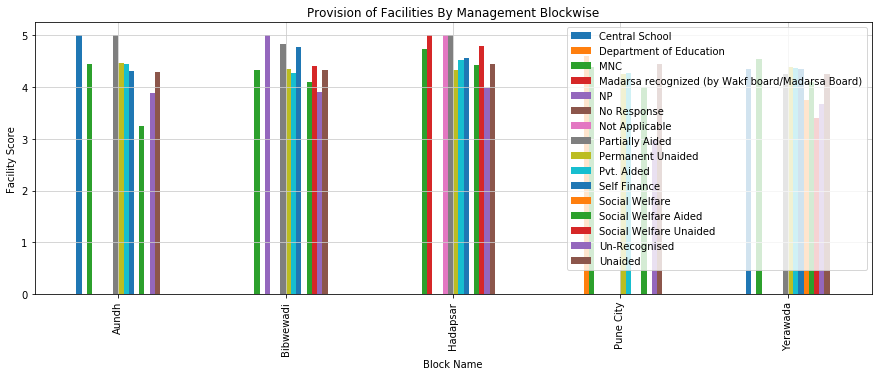

In [314]:
fig,ax= plt.subplots(figsize=(15,5))
mgmt_facility2=data.groupby(['Block Name','Management Name'])['facility_count'].mean()
mgmt_facility2.unstack(level=-1).plot(ax=ax,kind='bar')
plt.legend(loc='upper right')
plt.grid(True,color='0.80')
plt.title("Provision of Facilities By Management Blockwise")
plt.ylabel("Facility Score")

Text(0, 0.5, 'Facility Score')

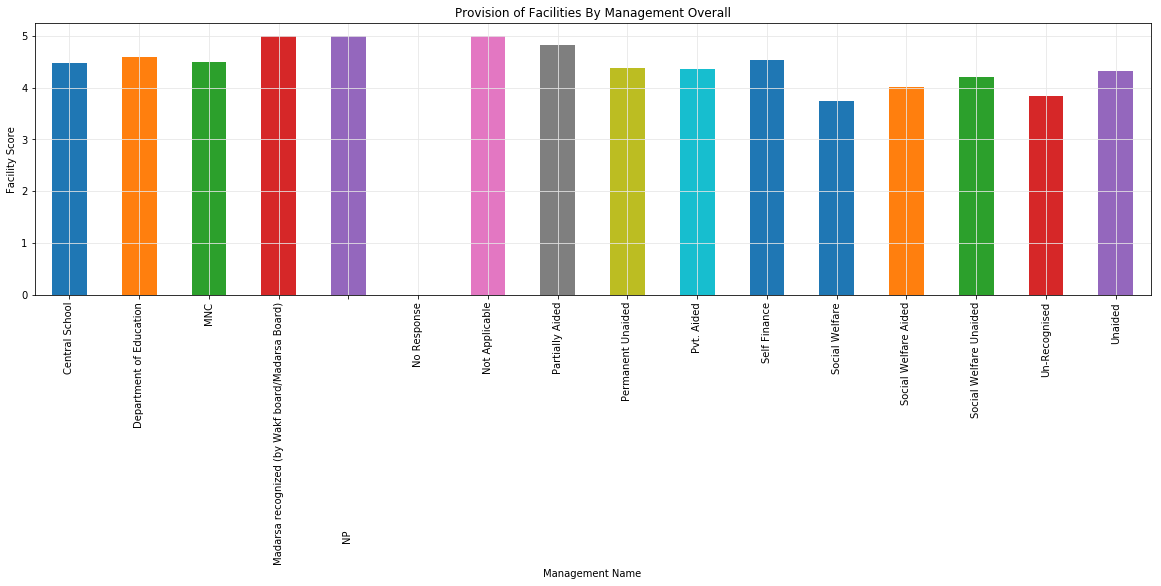

In [315]:
fig,ax= plt.subplots(figsize=(20,5))
mgmt_facility1 = data.groupby(['Management Name'])['facility_count'].mean()
mgmt_facility1.plot(ax=ax,kind='bar')

plt.grid(True, color='0.9')
plt.title("Provision of Facilities By Management Overall")
plt.ylabel("Facility Score")


## <span style="color:Orange"> Management vs Facility vs Number of schools under Management</span>

### This section shows how the Management facility performs with  number of schools under it.

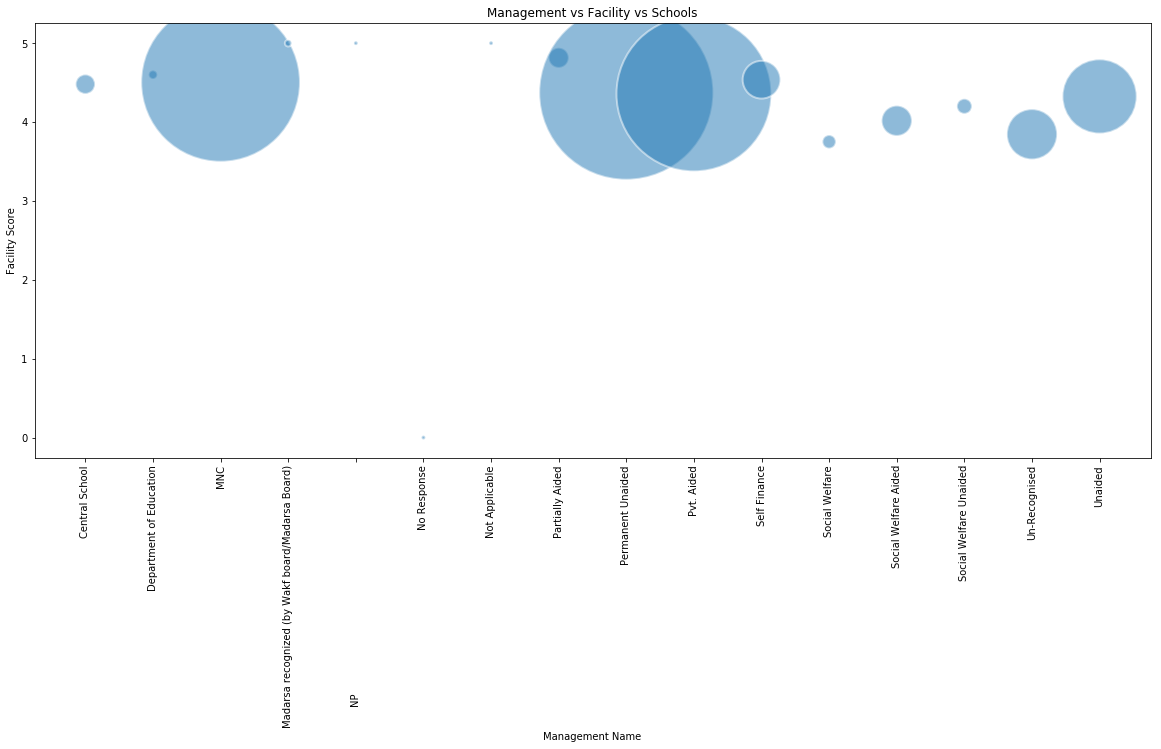

In [316]:
x = []
y = []
# color = []
area = []


fig,ax= plt.subplots(figsize=(20,8))
# print(data)
for i, row in mgmt_facility1.iteritems():
#  print(i, row)
 x.append(i) # murder
#  print(x)
 y.append(row) # burglary
#  color.append(row[6]) # larceny_theft 
 area.append(data['Management Name'].value_counts()[i]*15) # population
 # plotting the first eigth letters of the state's name
#  text(row[1], row[5], 
#       row[0],size=11,horizontalalignment='center')

# making the scatter plot
sct = scatter(x, y, s=area, linewidths=2, edgecolor='w')
sct.set_alpha(0.5)
#sct.figure(figsize=(8, 8), dpi=80)

# axis([0,11,200,1280])
xlabel('Management Name')
ylabel('Facility Score')
title("Management vs Facility vs Schools")
plt.xticks(rotation=90)
show()

In [317]:
data['Year'].value_counts()

2016-17    1247
2015-16    1233
2014-15    1223
2013-14    1190
2012-13    1184
Name: Year, dtype: int64

## <span style="color:Orange"> Time vs Student Population </span>

#### The below plot shows the variation of number of students in primary classes (classes 1-5) change over Time Blockwise

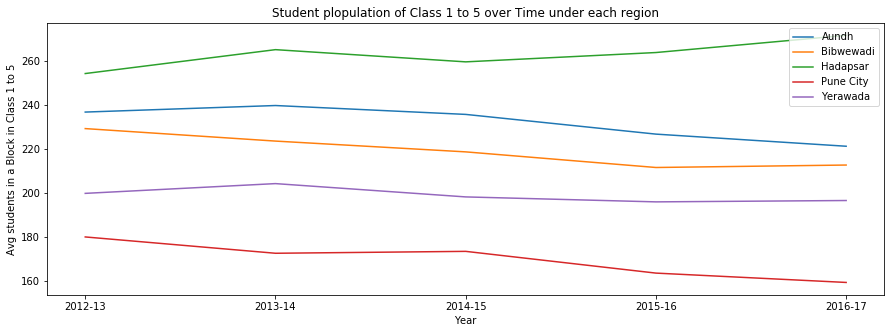

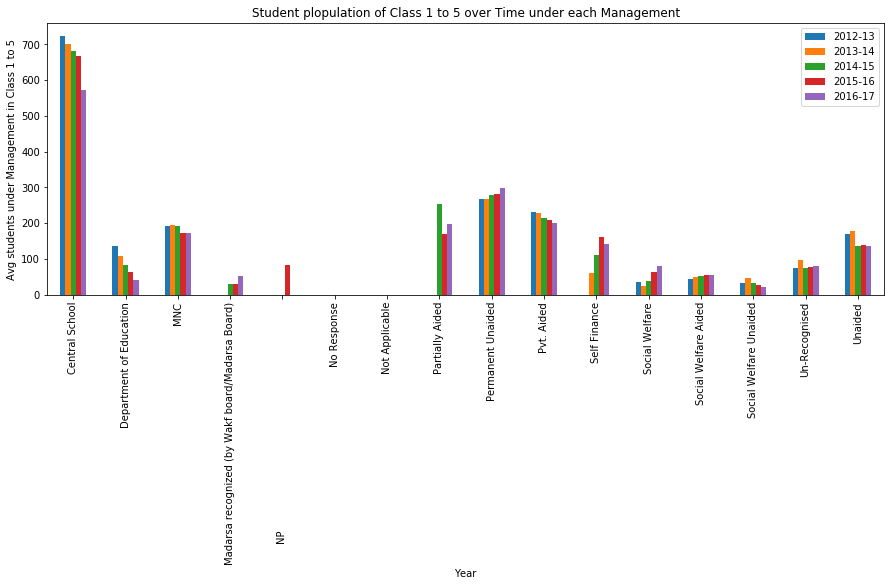

In [318]:
fig,ax= plt.subplots(figsize=(15,5))
grp=data.groupby(["Block Name", "Year"])['1_5 Total'].mean()
grp.unstack(level=0).plot(ax=ax)
xlabel('Year')
# plt.xticks(np.array(data['Year'].unique()))
xticks(np.arange(len(data['Year'].unique())),data['Year'].unique())
ylabel('Avg students in a Block in Class 1 to 5')
title('Student plopulation of Class 1 to 5 over Time under each region')
legend(loc='upper right')
show()

fig,ax= plt.subplots(figsize=(15,5))
grp=data.groupby(["Management Name", "Year"])['1_5 Total'].mean()
grp.unstack(level=-1).plot(ax=ax,kind='bar')
xlabel('Year')
# plt.xticks(np.array(data['Year'].unique()))
# xticks(np.arange(len(data['Year'].unique())),data['Year'].unique())

ylabel('Avg students under Management in Class 1 to 5')
title('Student plopulation of Class 1 to 5 over Time under each Management')
legend(loc='upper right')
show()
# grp

#### The below plot shows the variation of number of students in classes (1-12) change over Time Blockwise

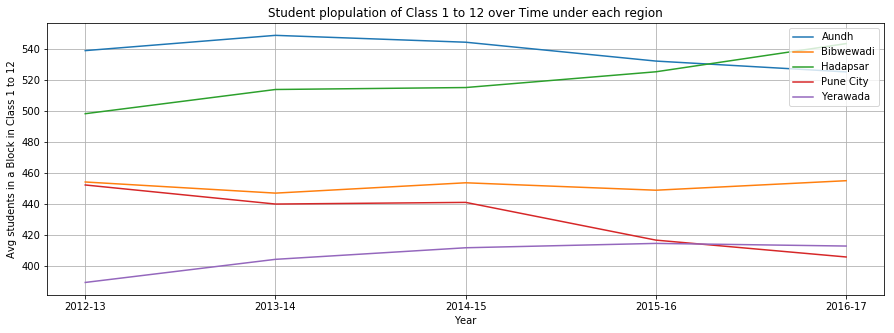

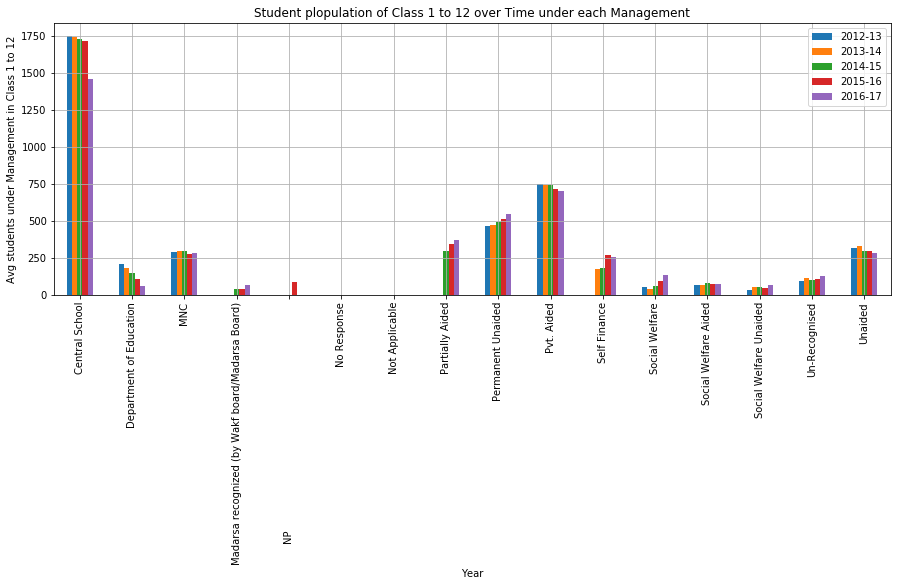

In [319]:
fig,ax= plt.subplots(figsize=(15,5))
grp=data.groupby(["Block Name", "Year"])['1_12 Total'].mean()
grp.unstack(level=0).plot(ax=ax)
xlabel('Year')
# plt.xticks(np.array(data['Year'].unique()))
xticks(np.arange(len(data['Year'].unique())),data['Year'].unique())
ylabel('Avg students in a Block in Class 1 to 12')
title('Student plopulation of Class 1 to 12 over Time under each region')
legend(loc='upper right')
grid(True)
show()

fig,ax= plt.subplots(figsize=(15,5))
grp=data.groupby(["Management Name", "Year"])['1_12 Total'].mean()
grp.unstack(level=-1).plot(ax=ax,kind='bar')
xlabel('Year')
# plt.xticks(np.array(data['Year'].unique()))
# xticks(np.arange(len(data['Year'].unique())),data['Year'].unique())
ylabel('Avg students under Management in Class 1 to 12')
title('Student plopulation of Class 1 to 12 over Time under each Management')
legend(loc='upper right')
grid(True)
show()

* The above plots clearly shows that over time the population of students in **Central School** show a slow declining trend in both class 1-5 and 1-12 sections. In contrast to it the **Permanently Unaided** and **Self Financed** schools show slow increasing trend of students over the perios 5 years.
* The **Central Schools** are very low in number as can be seen in the section [Block_vs_Management](#Block_vs_Management)
* Despite showing declining trend the **Central School** has hosted approximately <span style="color:red"> ** greater 1500** </span> students from class 1-12 for majority the time period.
* While the other top schools under **Permanent Unaided**, **MNC**, **Pvt. Aided** and **Unaided** hosts less than <span style="color:red"> **750** </span> students for a given Time Period. Bizzare!

## <span style="color:orange">Variation of Girls in the School</span>

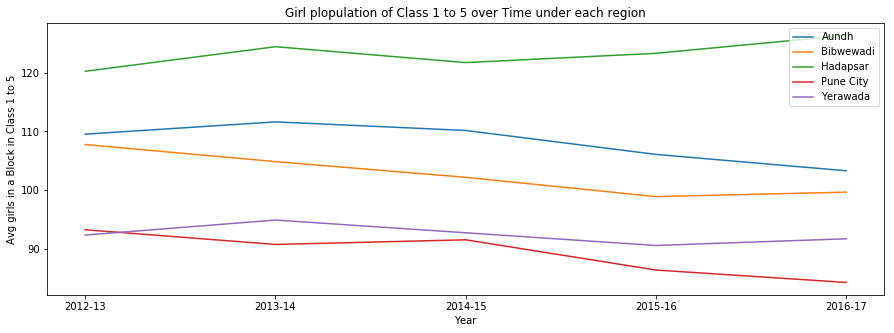

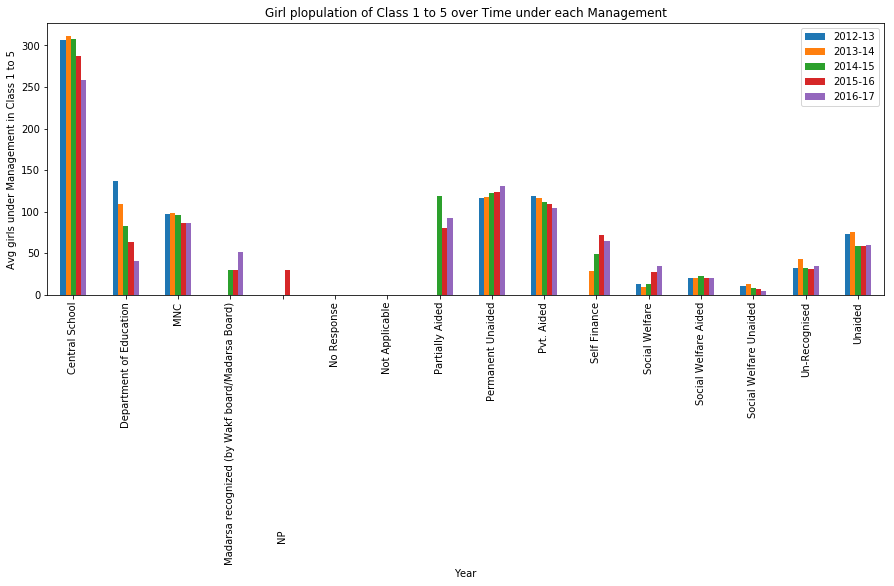

In [327]:
fig,ax= plt.subplots(figsize=(15,5))
grp=data.groupby(["Block Name", "Year"])['1_5 Girls'].mean()
grp.unstack(level=0).plot(ax=ax)
xlabel('Year')
# plt.xticks(np.array(data['Year'].unique()))
xticks(np.arange(len(data['Year'].unique())),data['Year'].unique())
ylabel('Avg girls in a Block in Class 1 to 5')
title('Girl plopulation of Class 1 to 5 over Time under each region')
legend(loc='upper right')
show()

fig,ax= plt.subplots(figsize=(15,5))
grp=data.groupby(["Management Name", "Year"])['1_5 Girls'].mean()
grp.unstack(level=-1).plot(ax=ax,kind='bar')
xlabel('Year')
# plt.xticks(np.array(data['Year'].unique()))
# xticks(np.arange(len(data['Year'].unique())),data['Year'].unique())

ylabel('Avg girls under Management in Class 1 to 5')
title('Girl plopulation of Class 1 to 5 over Time under each Management')
legend(loc='upper right')
show()
# grp

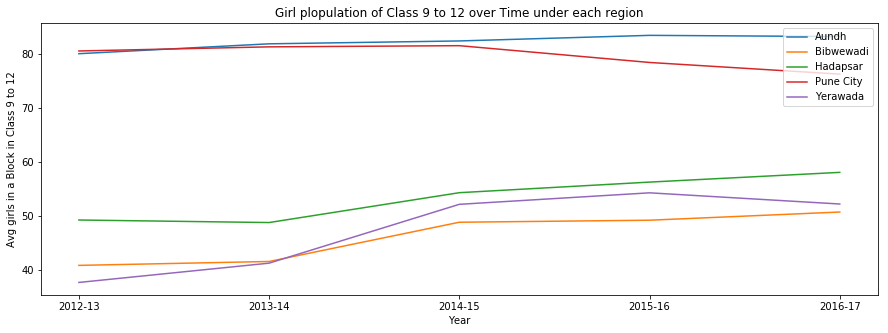

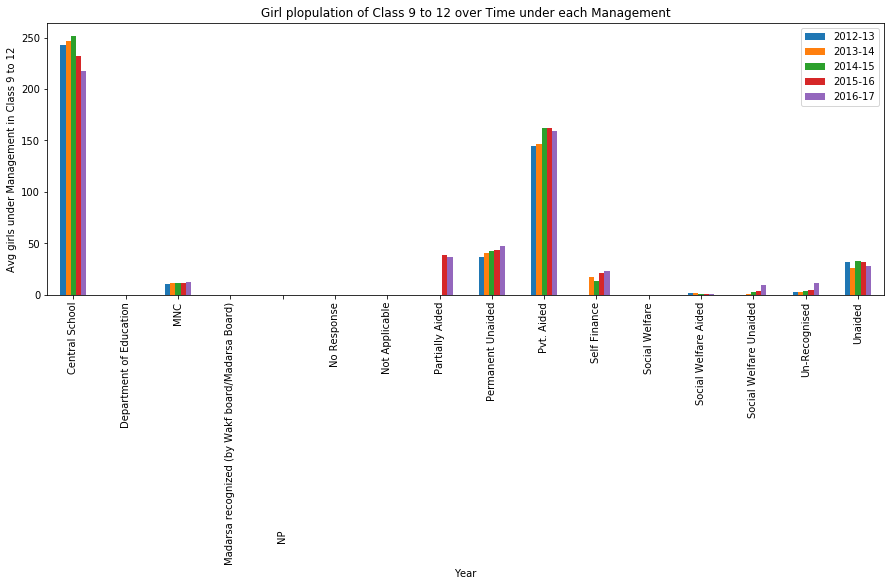

In [325]:
fig,ax= plt.subplots(figsize=(15,5))
grp=data.groupby(["Block Name", "Year"])['9_12 Girls'].mean()
grp.unstack(level=0).plot(ax=ax)
xlabel('Year')
# plt.xticks(np.array(data['Year'].unique()))
xticks(np.arange(len(data['Year'].unique())),data['Year'].unique())
ylabel('Avg girls in a Block in Class 9 to 12')
title('Girl plopulation of Class 9 to 12 over Time under each region')
legend(loc='upper right')
show()

fig,ax= plt.subplots(figsize=(15,5))
grp=data.groupby(["Management Name", "Year"])['9_12 Girls'].mean()
grp.unstack(level=-1).plot(ax=ax,kind='bar')
xlabel('Year')
# plt.xticks(np.array(data['Year'].unique()))
# xticks(np.arange(len(data['Year'].unique())),data['Year'].unique())

ylabel('Avg girls under Management in Class 9 to 12')
title('Girl plopulation of Class 9 to 12 over Time under each Management')
legend(loc='upper right')
show()

There has been a significant rise in the admission of girls in to the higher class in Hadapsar region

In [322]:
data['Year'].unique()

array(['2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype=object)

In [323]:
np.arange(0, 81, 10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

,Aundh,Yerawada,Bibwewadi,Hadapsar,Pune City
2012-13,236.822464,199.912134,229.321168,254.314010,180.127660
2013-14,239.795620,204.343220,223.649635,265.161290,172.719577
2014-15,235.763441,198.303644,218.752650,259.620087,173.583784
2015-16,226.812721,196.052632,211.658451,263.852814,163.712766
2016-17,221.307167,196.666667,212.773852,271.652542,159.470899


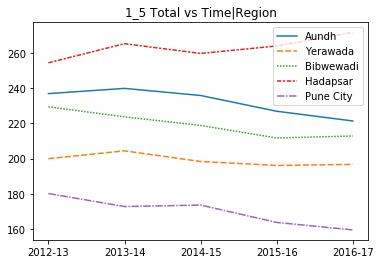

In [324]:
block_year_1_5_enroll = data.groupby(["Block Name", "Year"])['1_5 Total'].mean()
# sb.lineplot(data=block_year_1_5_enroll)
list_of_block = []
for block, val in data['Block Name'].value_counts().iteritems():
    temp = []
    for i,j in block_year_1_5_enroll.iteritems():
        if block == i[0]:
            temp.append(j)
    list_of_block.append(temp)
    
# for each in list_of_block:
#     plt.plot(each[1])
#     plt.title()
df = pd.DataFrame(columns=data['Block Name'].unique(), index=data['Year'].unique())

df['Aundh'] = list_of_block[0]
df['Bibwewadi'] = list_of_block[1]
df['Yerawada'] = list_of_block[2]
df['Hadapsar'] = list_of_block[3]
df['Pune City'] = list_of_block[4]
# df.plot(figsize=(10,5))
sb.lineplot(data=df, sizes=(10,10))
plt.title("1_5 Total vs Time|Region")
# aggregated = data.groupby(["Block Name", "Year"]).aggregate(np.mean)
# aggregated.plot(x='Year', y='Block Name', label='model')
# plt.xticks
# plt.show()
# for title, group in data.groupby(["Block Name", "Year"]).agge:
#     group.plot(x='Block Name', y='Year', title=title)
# df = pd.DataFrame(block_year_1_5_enroll)

# plt.show()
